In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import files
uploaded = files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


In [14]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [15]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [27]:
df = data.set_index("Quarter")
#set the index

In [28]:
df.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [29]:
df.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

In [38]:
df.index = pd.to_datetime(df.index.str.replace(r'(Q\d)_(\d+)', r'19\2-\1'))
#Datetime Conversion(String Replacement )( The regular expression)
#(Q\d) captures the quarter (Q1, Q2, etc.),(\d+) captures the year (86, 87, etc.)


In [39]:
df.head()

,Sales
Quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


In [40]:
df.index

DatetimeIndex(['1986-01-01', '1986-04-01', '1986-07-01', '1986-10-01',
               '1987-01-01', '1987-04-01', '1987-07-01', '1987-10-01',
               '1988-01-01', '1988-04-01', '1988-07-01', '1988-10-01',
               '1989-01-01', '1989-04-01', '1989-07-01', '1989-10-01',
               '1990-01-01', '1990-04-01', '1990-07-01', '1990-10-01',
               '1991-01-01', '1991-04-01', '1991-07-01', '1991-10-01',
               '1992-01-01', '1992-04-01', '1992-07-01', '1992-10-01',
               '1993-01-01', '1993-04-01', '1993-07-01', '1993-10-01',
               '1994-01-01', '1994-04-01', '1994-07-01', '1994-10-01',
               '1995-01-01', '1995-04-01', '1995-07-01', '1995-10-01',
               '1996-01-01', '1996-04-01'],
              dtype='datetime64[ns]', name='Quarter', freq=None)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 1986-01-01 to 1996-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


In [42]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


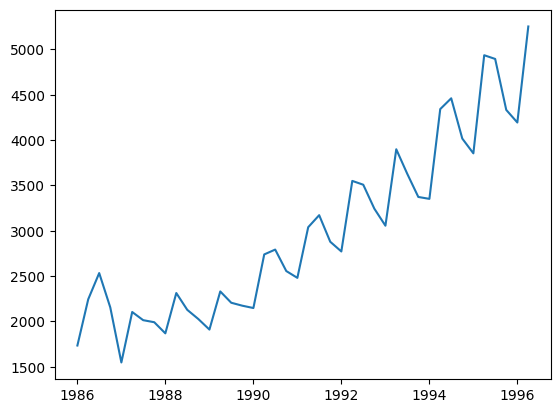

In [44]:
plt.plot(df)

#visualization of raw data

In [46]:
df.isna().sum()
#checking the nul values

Sales    0
dtype: int64

<Axes: ylabel='Density'>

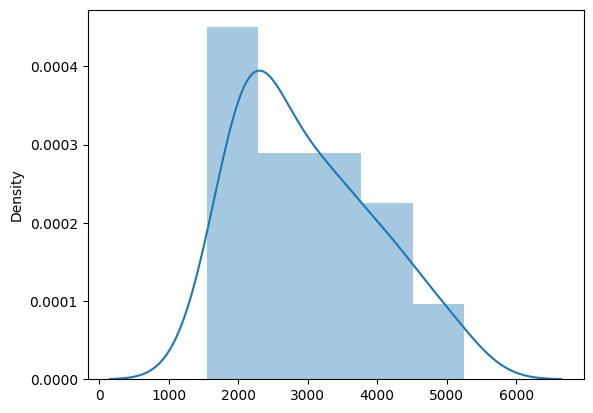

In [47]:
sns.distplot(df)
# distribution of the data

DECOMPOSITION

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [49]:
result= seasonal_decompose(df,model="additive")
#Classical Decomposition (Trend, Seasonal, Residual) :model = (additive and multiplicative)two types is there

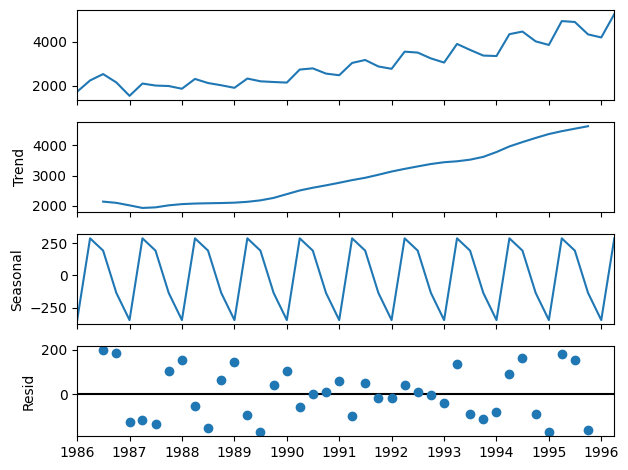

In [50]:
plot =result.plot()

In [51]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

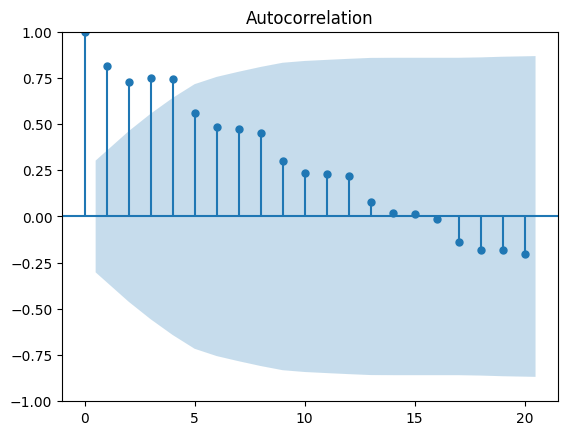

In [55]:
 acf = plot_acf(df,lags=20)
 #auto corelation Fuction

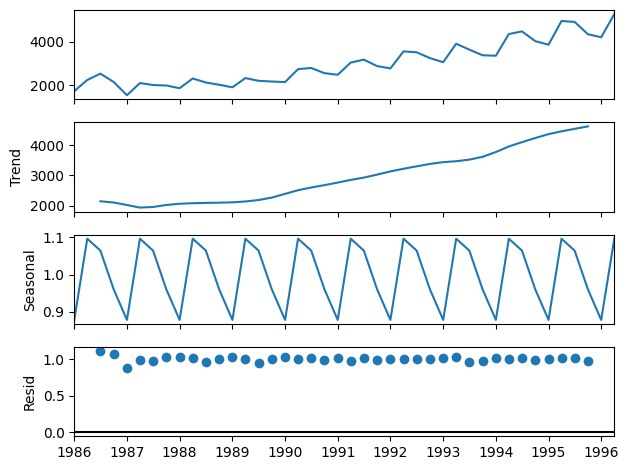

In [56]:
result_m = seasonal_decompose(df,model="multiplicative")
mul_plot = result_m.plot()

Stationary Check

In [57]:
from statsmodels.tsa.stattools import adfuller

In [59]:
test = adfuller(df)
#Augmented Dickey-Fuller- statistical hypothesis test for checking stationary

In [60]:
print(test)
print('ADF Statistic:', test[0])
print('p-value:', test[1])

(1.309421015326811, 0.9966611673930905, 7, 34, {'1%': -3.639224104416853, '5%': -2.9512301791166293, '10%': -2.614446989619377}, 395.6639212829265)
ADF Statistic: 1.309421015326811
p-value: 0.9966611673930905


In [61]:
if test[1]<0.05:
  print(" Reject the Null Hypothisis --> the data set is stationary")
else:
  print(" Accept the Null Hypothisis --> the data set is Not stationary")

 Accept the Null Hypothisis --> the data set is Not stationary


Model Building for Forcasting

In [70]:
train = df[0:32]
test = df[32:-1]

In [71]:
train.tail()

,Sales
Quarter,
1992-10-01,3243.859993
1993-01-01,3056.000000
1993-04-01,3899.000000
1993-07-01,3629.000000
1993-10-01,3373.000000


In [72]:
test.head()

,Sales
Quarter,
1994-01-01,3352.0
1994-04-01,4342.0
1994-07-01,4461.0
1994-10-01,4017.0
1995-01-01,3854.0


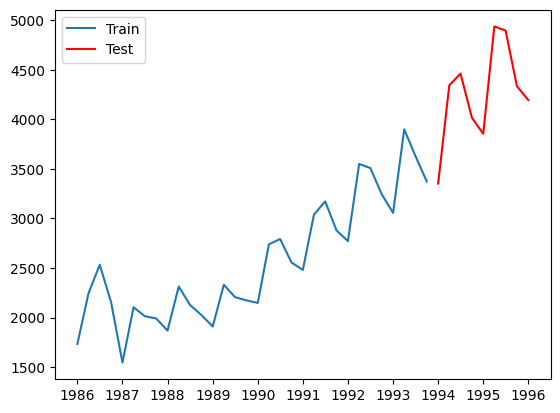

In [73]:
plt.plot(train,label="Train")
plt.plot(test,color="r",label="Test")
plt.legend()

Holt's Model (Double Exponential Smoothing)

In [74]:
from statsmodels.tsa.holtwinters import Holt

In [75]:
model_h = Holt(train["Sales"]).fit(smoothing_level=0.8,smoothing_slope=0.2)
#smoothing level is alpha value know as weight-high values indicates most importance to the past data
#smoothing slope is weight of trend equation(0-1) low value indicates most importance in past trend

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [76]:
pred_h = model_h.predict(test.index[0],test.index[-1])

In [79]:
rmse_h = mean_squared_error(test["Sales"],pred_h,squared=False)
rmse_h
# rmse = root(mse)--squared = false--> mse = (yi-y^i)2/n

791.258410580389

Holts winter exponential smoothing with additive seasonality and additive trend

In [80]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [82]:
model_hwa = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [83]:
pred_hwa = model_hwa.predict(test.index[0],test.index[-1])

In [84]:
pred_hwa[0:3]

1994-01-01    3339.987413
1994-04-01    3849.721074
1994-07-01    3792.911615
Freq: QS-OCT, dtype: float64

In [86]:
rmse_hwa = mean_squared_error(test["Sales"],pred_hwa,squared=False)
rmse_hwa

662.2460753706087

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [87]:
model_hwm = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [88]:
pred_hwm = model_hwm.predict(test.index[0],test.index[-1])

In [90]:
pred_hwm[0:5]

1994-01-01    3210.762512
1994-04-01    3944.715779
1994-07-01    3866.989623
1994-10-01    3491.165845
1995-01-01    3250.177728
Freq: QS-OCT, dtype: float64

In [89]:
rmse_hwm = mean_squared_error(test["Sales"],pred_hwm,squared=False)
rmse_hwm

635.0813167714033

ARIMA Model

In [92]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [93]:
model_ar = ARIMA(train["Sales"],order=(1,1,1)).fit()

In [95]:
pred_ar = model_ar.predict(test.index[0],test.index[-1])

In [97]:
pred_ar[0:4]

1994-01-01    3437.664350
1994-04-01    3450.069460
1994-07-01    3452.449237
1994-10-01    3452.905770
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [98]:
rmse_arima = mean_squared_error(test.Sales,pred_ar,squared=False)
rmse_arima

936.9620837242958

In [99]:
models =["Holt's Smoothing","Holt's Winter_Additive","Holt's Winter_Multiplicative","ARIMA"]
rmse = [rmse_h,rmse_hwa,rmse_hwm,rmse_arima]

d = {"Model_Name":models,"RMSE":rmse}
d1=pd.DataFrame(d)
d1.sort_values(ascending=True,by="RMSE")

,Model_Name,RMSE
2,Holt's Winter_Multiplicative,635.081317
1,Holt's Winter_Additive,662.246075
0,Holt's Smoothing,791.258411
3,ARIMA,936.962084


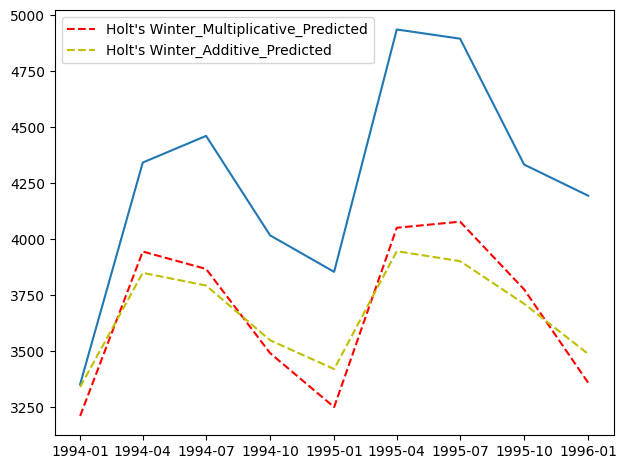

In [102]:
plt.plot(test)
plt.plot(pred_hwm, color="r", linestyle="--", label="Holt's Winter_Multiplicative_Predicted")
plt.plot(pred_hwa, color="y", linestyle="--", label="Holt's Winter_Additive_Predicted")
plt.legend()
plt.tight_layout()

In [103]:
#So Holt's exponential smoothing with multiplicative seasonality and additive trend is the best model as it has the lowest rmse.